<a href="https://colab.research.google.com/github/kay-owolabi/udlbook/blob/main/Notebooks/Chap02/2_1_Supervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 2.1 Supervised Learning

The purpose of this notebook is to explore the linear regression model discussed in Chapter 2 of the book.

Work through the cells below, running each cell in turn. In various places you will see the words "TODO". Follow the instructions at these places and write code to complete the functions. There are also questions interspersed in the text.

Contact me at udlbookmail@gmail.com if you find any mistakes or have any suggestions.

In [2]:
# Math library
import torch
# Plotting library
import matplotlib.pyplot as plt

In [3]:
# Create some input / output data
x = torch.tensor([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = torch.tensor([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y)

tensor([0.0300, 0.1900, 0.3400, 0.4600, 0.7800, 0.8100, 1.0800, 1.1800, 1.3900,
        1.6000, 1.6500, 1.9000])
tensor([0.6700, 0.8500, 1.0500, 1.0000, 1.4000, 1.5000, 1.3000, 1.5400, 1.5500,
        1.6800, 1.7300, 1.6000])


In [4]:
# Define 1D linear regression model
def f(x, phi0, phi1):
  # TODO :  Replace this line with the linear regression model (eq 2.4)
  y = phi0 + phi1 * x

  return y

In [5]:
# Function to help plot the data
def plot(x, y, phi0, phi1):
    fig,ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, $x$')
    ax.set_ylabel('Output, $y$')
    # Draw line
    x_line = torch.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)

    plt.show()

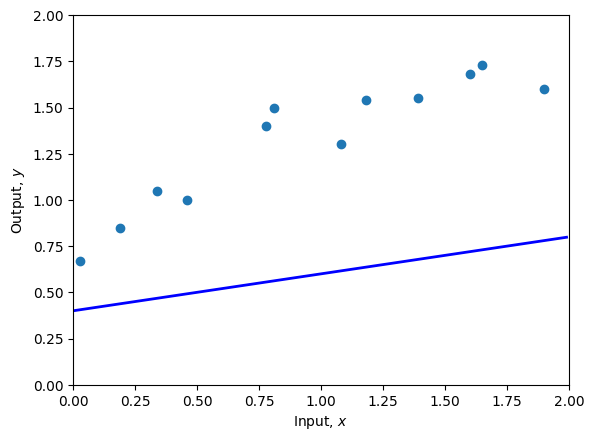

In [6]:
# Set the intercept and slope as in figure 2.2b
phi0 = 0.4 ; phi1 = 0.2
# Plot the data and the model
plot(x,y,phi0,phi1)

In [7]:
# Function to calculate the loss
def compute_loss(x,y,phi0,phi1):

  # TODO Replace this line with the loss calculation (equation 2.5)
  loss = torch.sum((f(x, phi0, phi1) - y) ** 2)


  return loss

In [8]:
# Compute the loss for our current model
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


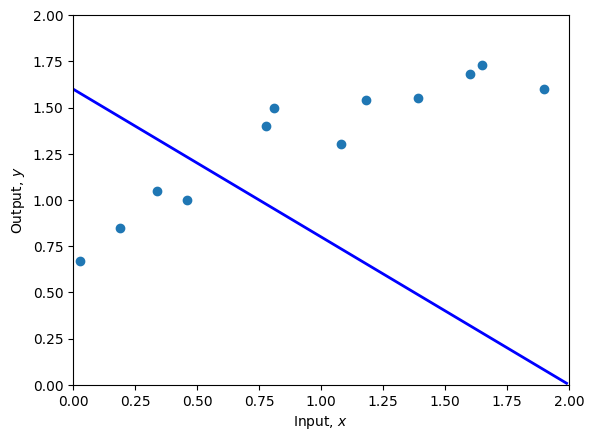

Your Loss = 10.28, Ground truth =10.28


In [9]:
# Set the intercept and slope as in figure 2.2c
phi0 = 1.60 ; phi1 =-0.8
# Plot the data and the model
plot(x,y,phi0,phi1)
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

Step 0: loss=10.2795, phi0=1.7160, phi1=-0.5797
Step 10: loss=2.0675, phi0=1.5239, phi1=-0.0900
Step 20: loss=1.0264, phi0=1.2904, phi1=0.1151
Step 30: loss=0.5656, phi0=1.1349, phi1=0.2514
Step 40: loss=0.3617, phi0=1.0315, phi1=0.3420
Step 50: loss=0.2715, phi0=0.9627, phi1=0.4024
Step 60: loss=0.2316, phi0=0.9169, phi1=0.4425
Step 70: loss=0.2139, phi0=0.8865, phi1=0.4692
Step 80: loss=0.2061, phi0=0.8662, phi1=0.4869
Step 90: loss=0.2026, phi0=0.8527, phi1=0.4988
Step 100: loss=0.2011, phi0=0.8438, phi1=0.5066
Step 110: loss=0.2004, phi0=0.8378, phi1=0.5118
Step 120: loss=0.2001, phi0=0.8338, phi1=0.5153
Step 130: loss=0.2000, phi0=0.8312, phi1=0.5176
Step 140: loss=0.1999, phi0=0.8294, phi1=0.5192
Step 150: loss=0.1999, phi0=0.8283, phi1=0.5202
Step 160: loss=0.1999, phi0=0.8275, phi1=0.5209
Step 170: loss=0.1999, phi0=0.8270, phi1=0.5213
Step 180: loss=0.1999, phi0=0.8266, phi1=0.5216
Step 190: loss=0.1999, phi0=0.8264, phi1=0.5218
Step 200: loss=0.1999, phi0=0.8263, phi1=0.5220


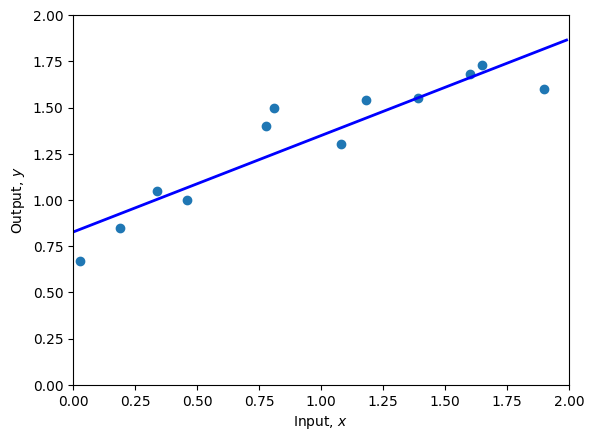

Your Loss = 0.20


In [10]:
# TODO -- Change the parameters manually to fit the model
# First fix phi1 and try changing phi0 until you can't make the loss go down any more
# Then fix phi0 and try changing phi1 until you can't make the loss go down any more
# Repeat this process until you find a set of parameters that fit the model as in figure 2.2d
# You can either do this by hand, or if you want to get fancy, write code to descent automatically in this way
# Start at these values:
phi0 = 1.60 ; phi1 =-0.8

phi0Tensor = torch.tensor(1.6)
phi1Tensor = torch.tensor(-0.8)

lr = 0.01

for step in range(215):
  y_pred = f(x,phi0Tensor,phi1Tensor)

  diff = y_pred - y
  dphi0 = 2 * diff.sum()
  dphi1 = 2 * (diff * x).sum()

  phi0Tensor = phi0Tensor - lr * dphi0
  phi1Tensor = phi1Tensor - lr * dphi1

  if step % 10 == 0:
        loss = (diff ** 2).sum()
        print(f"Step {step}: loss={loss.item():.4f}, phi0={phi0Tensor.item():.4f}, phi1={phi1Tensor.item():.4f}")


print("Final phi0:", phi0Tensor)
print("Final phi1:", phi1Tensor)
phi0 = phi0Tensor.item()
phi1 = phi1Tensor.item()
plot(x,y,phi0,phi1)
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

# Visualizing the loss function

The above process is equivalent to descending coordinate wise on the loss function<br>

Now let's plot that function

In [89]:
# Make a 2D grid of possible phi0 and phi1 values
phi0_mesh, phi1_mesh = torch.meshgrid(torch.arange(0.0,2.0,0.02), torch.arange(-1.0,1.0,0.02), indexing='xy')

# Make a 2D array for the losses
all_losses = torch.zeros_like(phi1_mesh)
# Run through each 2D combination of phi0, phi1 and compute loss
# for indices,temp in torch.ndindex(phi1_mesh.shape):
#     all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])
for i in range(phi1_mesh.shape[0]):
    for j in range(phi1_mesh.shape[1]):
        all_losses[i, j] = compute_loss(x, y, phi0_mesh[i, j], phi1_mesh[i, j])


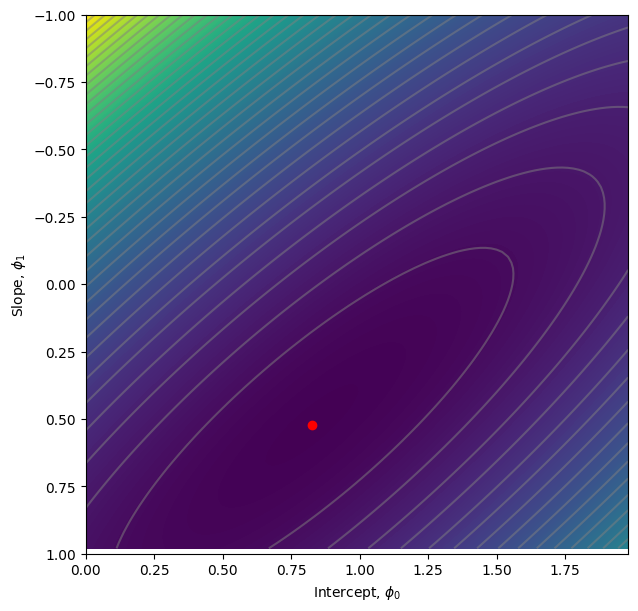

In [90]:
# Plot the loss function as a heatmap
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, $\phi_0$')
ax.set_ylabel(r'Slope, $\phi_1$')

# Plot the position of your best fitting line on the loss function
# It should be close to the minimum
ax.plot(phi0,phi1,'ro')
plt.show()